In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [10]:
data=pd.read_csv('data')

TypeError: parser_f() got an unexpected keyword argument 'palette'

In [8]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [13]:
#sns.pairplot(data,palette='coolwarm')

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss=StandardScaler()

In [16]:
ss.fit(data.drop(['TARGET CLASS'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
features=ss.transform(data.drop(['TARGET CLASS'],axis=1))

In [20]:
new_data=pd.DataFrame(features,columns=data.columns[:-1])
new_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
x=new_data
y=data['TARGET CLASS']

In [27]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
pred=knn.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report 

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       155
           1       0.70      0.78      0.74       145

    accuracy                           0.73       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300



In [38]:
error_rate=[]

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

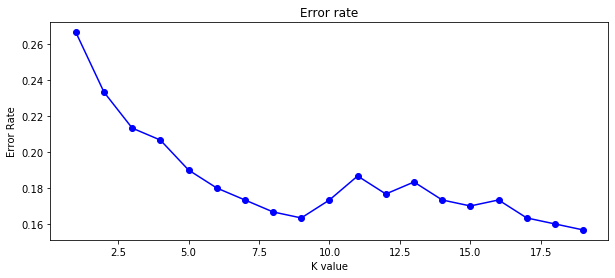

In [40]:
plt.figure(figsize=(10,4))
plt.plot(range(1,20),error_rate,color='blue',marker='o')
plt.title('Error rate')
plt.xlabel('K value')
plt.ylabel('Error Rate')